In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.shape

(10127, 23)

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
dfn=df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


In [8]:
dfn.shape

(10127, 20)

In [9]:
objList = dfn.select_dtypes(include = "object").columns #
print (objList)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for avu in objList:
    dfn[avu] = le.fit_transform(dfn[avu].astype(str))

print (dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
dfn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
X = dfn.drop('Attrition_Flag',axis=1)
y = dfn['Attrition_Flag']

In [13]:
print (X)

       Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                3               1   
1                49       0                5                2               2   
2                51       1                3                2               1   
3                40       0                4                3               3   
4                40       1                3                5               1   
...             ...     ...              ...              ...             ...   
10122            50       1                2                2               2   
10123            41       1                2                6               0   
10124            44       0                1                3               1   
10125            30       1                2                2               3   
10126            43       0                2                2               1   

       Income_Category  Car

In [14]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int32


# DECISION TREE

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify=y) 

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=17)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.941


In [17]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.03583423 0.00129243 0.00515139 0.0044038  0.00710518 0.00494175
 0.         0.01351485 0.07303013 0.00989041 0.01201373 0.00911147
 0.14218242 0.01625983 0.06639919 0.18566992 0.32471858 0.07839844
 0.01008228]


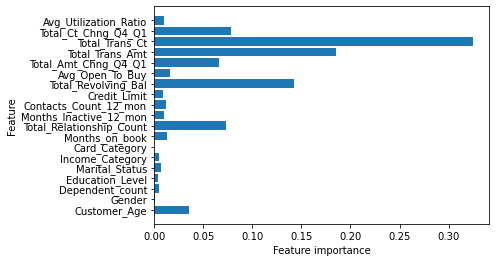

In [18]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

# RANDOM FOREST-DT

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.956


In [20]:
print("Feature importances:\n{}".format(forest.feature_importances_))

Feature importances:
[0.03395786 0.00886931 0.01252268 0.01194785 0.00832927 0.01006093
 0.00193896 0.02334671 0.07330411 0.02321368 0.02930671 0.03254897
 0.11985677 0.03186222 0.06351296 0.17968039 0.1709407  0.10293614
 0.06186378]


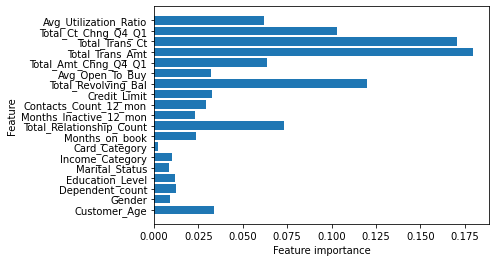

In [21]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

# GRADIENT BOOSTING

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.965


In [23]:
print("Feature importances:\n{}".format(gbrt.feature_importances_))

Feature importances:
[1.19466018e-02 3.59184895e-04 2.13691949e-04 1.35281414e-04
 9.81254364e-04 8.10309963e-05 8.64268288e-05 2.23836564e-03
 9.57271261e-02 1.35834390e-02 1.57121824e-02 4.45509158e-04
 1.77061477e-01 1.86097148e-03 3.34789525e-02 2.01466810e-01
 3.36908336e-01 1.06555113e-01 1.15824537e-03]


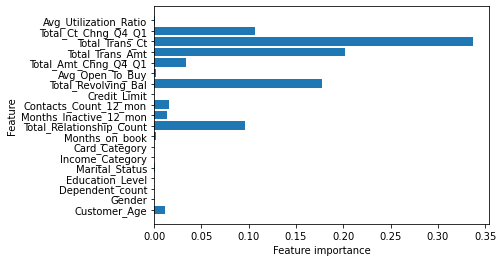

In [24]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
Xa= scaler.transform(X)

print(Xa)


[[0.40425532 1.         0.6        ... 0.24806202 0.43753366 0.06106106]
 [0.4893617  0.         1.         ... 0.17829457 1.         0.10510511]
 [0.53191489 1.         0.6        ... 0.07751938 0.6281637  0.        ]
 ...
 [0.38297872 0.         0.2        ... 0.3875969  0.22024771 0.        ]
 [0.08510638 1.         0.4        ... 0.40310078 0.19439957 0.        ]
 [0.36170213 0.         0.4        ... 0.39534884 0.17474421 0.18918919]]


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train) 

knn.score(X_train,y_train)

0.9369213677323788

In [27]:
knn.score(X_test,y_test)

0.8884501480750246

# K-MEANS CLUSTERING

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [29]:
dfn.shape


(10127, 20)

In [30]:
dfn = dfn.drop(['Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Credit_Limit','Avg_Utilization_Ratio'],axis=1)


In [31]:
dfn.shape

(10127, 12)

In [32]:
X = dfn.drop('Attrition_Flag',axis=1)
X.head()


,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,45,39,5,1,3,777,11914.0,1.335,1144,42,1.625
1,49,44,6,1,2,864,7392.0,1.541,1291,33,3.714
2,51,36,4,1,0,0,3418.0,2.594,1887,20,2.333
3,40,34,3,4,1,2517,796.0,1.405,1171,20,2.333
4,40,21,5,1,0,0,4716.0,2.175,816,28,2.500


In [33]:
y = dfn['Attrition_Flag']
y.head()
y.shape


(10127,)

In [34]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
Xn = scaler.transform(X)


In [35]:
kmeans = KMeans(n_clusters=2,algorithm='auto') # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(Xn)


KMeans(n_clusters=2)

In [37]:
correct = 0
for i in range(len(Xn)):
    NL = np.array(Xn[i].astype(float))
    #NL = NL.reshape(-1, len(NL))
print(NL)  
NL.shape


[3.19764441e-03 1.85909559e-03 4.46182941e-04 1.48727647e-04
 2.97455294e-04 1.45827458e-01 6.26663940e-01 5.22777679e-05
 7.65501199e-01 4.53619323e-03 4.82621214e-05]


(11,)

In [38]:
correct = 0
for i in range(len(Xn)):
    NL = np.array(Xn[i].astype(float))
    NL = NL.reshape(-1, len(NL))
    prediction = kmeans.predict(NL)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(Xn))

0.5470524340870939
